In [1]:
!pip install pystan

    100% |████████████████████████████████| 34.6MB 18kB/s eta 0:00:011


In [3]:
!pip install fbprophet

  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /Users/ianhansel/Library/Caches/pip/wheels/43/f2/6c/5ed49d64b0aab1affc668d4555481db950fc4cc51658198951
Successfully built fbprophet


In [4]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [5]:
# Read in data
df = pd.read_csv('../../data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
# Fit a time series model
m = Prophet()
m.fit(df);

In [7]:
# Predict future time series
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200900,7.399339,8.857390
3266,2017-01-16,8.525905,7.783303,9.276578
3267,2017-01-17,8.313265,7.553033,9.015470
3268,2017-01-18,8.145861,7.432418,8.887048
3269,2017-01-19,8.157749,7.496210,8.900082


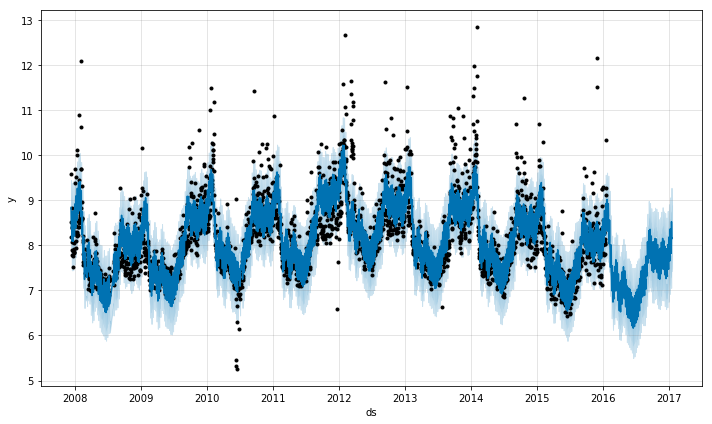

In [13]:
# Plot the forecasted values
from matplotlib import pyplot as plt
%matplotlib inline

m.plot(forecast);

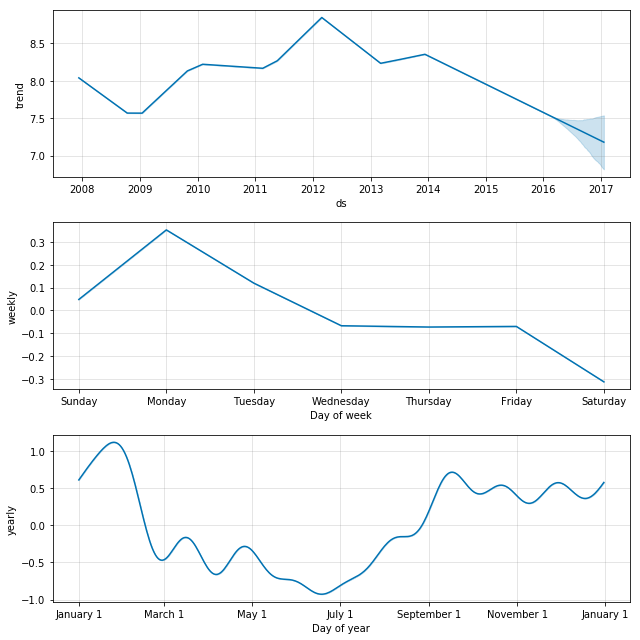

In [14]:
# Time Series Decomposition
m.plot_components(forecast);